<a href="https://colab.research.google.com/github/RJAbuNasser/Final-Project/blob/main/Latest(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [8]:
#First cell
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import wilcoxon, friedmanchisquare, shapiro
from statsmodels.stats.multitest import multipletests

**Inspecting Data**

In [9]:
#Second cell
zip_path = "Test and Actual.zip"
temp_dir = "temp_extracted"

if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(temp_dir)

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if "_full.xlsx" in file:
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            excel_data = pd.ExcelFile(file_path)
            for sheet_name in excel_data.sheet_names:
                if sheet_name.startswith("Sheet"):
                    print(f"Sheet: {sheet_name}")
                    df = excel_data.parse(sheet_name)

                    print(df.describe(include="all"))
                    print(df.info())

Streaming output truncated to the last 5000 lines.
std     36560.979028   33439.629571   38028.798126   40067.400544  
min         0.000000       0.000000       0.000000       0.000000  
25%        26.987626      27.327777      36.823589      16.867873  
50%       741.094968     579.579301     673.643912     552.319523  
75%      1474.455340    1802.046333    1910.584300    1966.715950  
max    146897.000000  134562.000000  152923.000000  161110.000000  

[8 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   3990.20876  16 non-null     float64
 1   2480.30772  16 non-null     float64
 2   3244.02646  16 non-null     float64
 3   2900.80124  16 non-null     float64
 4   2916.80232  16 non-null     float64
 5   2591.89884  16 non-null     float64
 6   2691.16627  16 non-null     float64
 7   2993.81247  16 non-null     float64
 8   

**Visualizing Tallies**

Processing file: temp_extracted/Test and Actual/CEC3591/20-D/jSObinexpEig_20_full.xlsx
Sheet: Sheet1


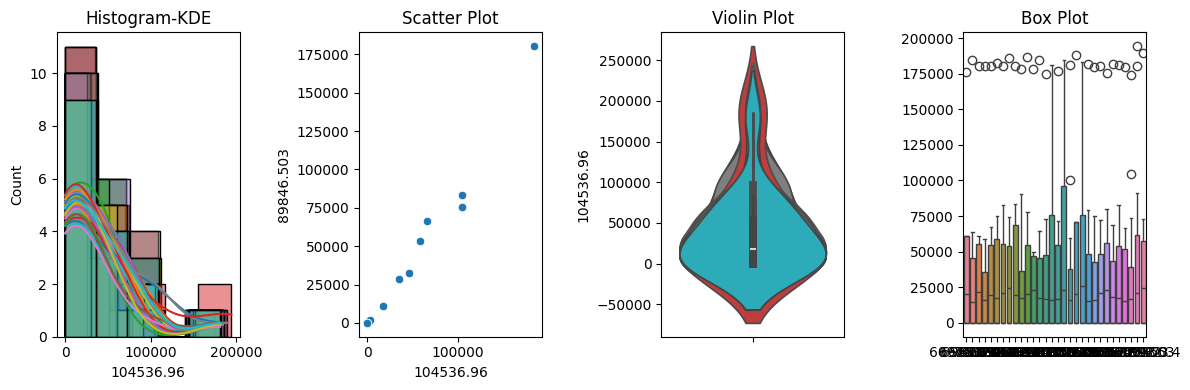

Sheet: Sheet2


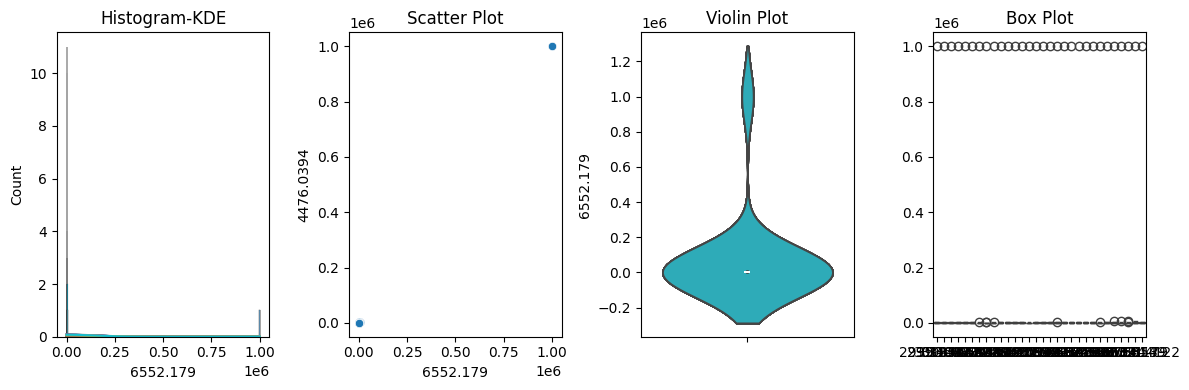

Sheet: Sheet3


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d5906efd1b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#Third cell
for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if "_full.xlsx" in file:
            file_path = os.path.join(root, file)
            print(f"Processing file: {file_path}")

            excel_data = pd.ExcelFile(file_path)
            for sheet_name in excel_data.sheet_names:
                if sheet_name.startswith("Sheet"):
                    print(f"Sheet: {sheet_name}")
                    df = excel_data.parse(sheet_name)

                    plt.figure(figsize=(12, 4))

                    plt.subplot(1, 4, 1)
                    for column in df.select_dtypes(include=["number"]).columns:
                        sns.histplot(df[column], kde=True)
                    plt.title("Histogram-KDE")

                    plt.subplot(1, 4, 2)
                    if len(df.columns) >= 2:
                        sns.scatterplot(x=df.columns[0], y=df.columns[1], data=df)
                    plt.title("Scatter Plot")

                    plt.subplot(1, 4, 3)
                    for column in df.select_dtypes(include=["number"]).columns:
                        sns.violinplot(y=df[column])
                    plt.title("Violin Plot")

                    plt.subplot(1, 4, 4)
                    sns.boxplot(data=df.select_dtypes(include=["number"]))
                    plt.title("Box Plot")

                    plt.tight_layout()
                    plt.show()

**Shapiro, Mean Error, and Std Dev**

In [10]:
#Forth cell
mean_errors = {}
std_devs = {}
shapiro_p_values = {}

temp_dir = "temp_extracted"

for root, dirs, files in os.walk(temp_dir):
    for file in files:
        if file.endswith("_actual.xlsx") or file.endswith("_full.xlsx"):
            file_path = os.path.join(root, file)

            if "_actual.xlsx" in file:
                full_file = file.replace("_actual.xlsx", "_full.xlsx")

                if full_file in files:
                    print(f"Processing: {file} and {full_file}")

                    actual_data = pd.ExcelFile(file_path)
                    full_data = pd.ExcelFile(os.path.join(root, full_file))

                    for sheet_name in actual_data.sheet_names:
                        if sheet_name in full_data.sheet_names:
                            df_actual = actual_data.parse(sheet_name, header=None)
                            df_full = full_data.parse(sheet_name, header=None)

                            numeric_columns = df_actual.select_dtypes(include="number").columns
                            if not numeric_columns.empty:
                                mean_errors[sheet_name] = {}
                                std_devs[sheet_name] = {}
                                shapiro_p_values[sheet_name] = {}

                                for col in numeric_columns:
                                    actual_col_data = df_actual.iloc[:, col]
                                    full_col_data = df_full.iloc[:, col]

                                    mean_error = (full_col_data - actual_col_data).mean()
                                    std_dev = full_col_data.std()
                                    shapiro_stat, shapiro_p = stats.shapiro(actual_col_data)

                                    mean_errors[sheet_name][col] = mean_error
                                    std_devs[sheet_name][col] = std_dev
                                    shapiro_p_values[sheet_name][col] = shapiro_p

                                    print(f"Sheet: {sheet_name}, Column: {col}")
                                    print(f"  Mean Error: {mean_error}")
                                    print(f"  Standard Deviation: {std_dev}")
                                    print(f"  Shapiro Test p-value: {shapiro_p}")

#print("Mean Errors: ", mean_errors)
#print("Standard Deviations: ", std_devs)
#print("Shapiro Test p-values: ", shapiro_p_values)

mean_errors_df = pd.DataFrame(mean_errors)
std_devs_df = pd.DataFrame(std_devs)
shapiro_p_values_df = pd.DataFrame(shapiro_p_values)

with pd.ExcelWriter("10D_results.xlsx") as writer:
    mean_errors_df.to_excel(writer, sheet_name='Mean Errors')
    std_devs_df.to_excel(writer, sheet_name='Standard Deviations')
    shapiro_p_values_df.to_excel(writer, sheet_name='Shapiro P-Values')

with pd.ExcelWriter("20D_results.xlsx") as writer:
    mean_errors_df.to_excel(writer, sheet_name='Mean Errors')
    std_devs_df.to_excel(writer, sheet_name='Standard Deviations')
    shapiro_p_values_df.to_excel(writer, sheet_name='Shapiro P-Values')

Streaming output truncated to the last 5000 lines.
  Shapiro Test p-value: 2.1866486504302696e-08
Sheet: Sheet7, Column: 11
  Mean Error: 0.0
  Standard Deviation: 242486.5721773596
  Shapiro Test p-value: 2.1866685840122418e-08
Sheet: Sheet7, Column: 12
  Mean Error: 0.0
  Standard Deviation: 242486.21886420503
  Shapiro Test p-value: 2.18610376419208e-08
Sheet: Sheet7, Column: 13
  Mean Error: 0.0
  Standard Deviation: 242487.55808543056
  Shapiro Test p-value: 2.1868319651107176e-08
Sheet: Sheet7, Column: 14
  Mean Error: 0.0
  Standard Deviation: 242485.96046968646
  Shapiro Test p-value: 2.186218193882466e-08
Sheet: Sheet7, Column: 15
  Mean Error: 0.0
  Standard Deviation: 242485.7107230218
  Shapiro Test p-value: 2.186669732386057e-08
Sheet: Sheet7, Column: 16
  Mean Error: 0.0
  Standard Deviation: 242485.78150376456
  Shapiro Test p-value: 2.1865483640876393e-08
Sheet: Sheet7, Column: 17
  Mean Error: 0.0
  Standard Deviation: 242486.34704520484
  Shapiro Test p-value: 2.18665


*   **make the date_ref a list to match curr_data**


*   **separate t-test and wilcoxon**



*   **include friedman**








In [16]:
import numpy as np

def calculate_reference_data(full_data, method):
    reference_data = {}

    for sheet_name in full_data.sheet_names:
        df = full_data.parse(sheet_name, header=None)
        numeric_columns = df.select_dtypes(include="number").columns

        for col in numeric_columns:
            if col not in reference_data:
                reference_data[col] = []

            non_null_values = df[col].dropna().tolist()
            reference_data[col].extend(non_null_values)

    # Aggregate reference data based on the specified method
    aggregated_data = {}
    for col, values in reference_data.items():
        if values:
            if method == 'least':
                aggregated_data[col] = min(values)
            elif method == 'highest':
                aggregated_data[col] = max(values)
            else:
                aggregated_data[col] = values  # Keep all values if method is not defined
        else:
            aggregated_data[col] = np.nan

    reference_data_df = pd.DataFrame.from_dict(aggregated_data, orient='index').T
    #print("Reference Data:")
    #print(reference_data_df) #for debugging
    return reference_data_df

def perform_tests(full_file, full_data, method):
    reference_data= calculate_reference_data(full_data, method)

    ttest_results, wilcoxon_results = {}, {}

    for sheet_name in full_data.sheet_names:
        df_current = full_data.parse(sheet_name, header=None)
        ttest_results[sheet_name], wilcoxon_results[sheet_name] = {}, {}

        for col in reference_data.keys():
            if col in df_current.columns:
                data_curr = df_current[col].dropna()
                data_ref = reference_data[col]

                # Debugging output
                print(f"Processing {full_file}, {sheet_name}, Column {col}:")
                print(f"  Current Data: {data_curr.tolist()}")
                print(f"  Reference Data: {data_ref}")

                # Ensure both datasets are aligned
                if len(data_curr) > 1 and len(data_ref) > 1:
                    # Perform T-test
                    t_stat, t_p = stats.ttest_rel(data_ref, data_curr)
                    ttest_results[sheet_name][col] = t_p

                    # Perform Wilcoxon test
                    if len(data_curr[data_curr > 0]) > 1:
                        w_stat, w_p = stats.wilcoxon(data_ref, data_curr)
                        wilcoxon_results[sheet_name][col] = w_p
                    else:
                        wilcoxon_results[sheet_name][col] = None
                else:
                    # Add your check here
                    print(f"Skipping tests for {full_file}, {sheet_name}, Column {col} due to insufficient reference data.")
                    ttest_results[sheet_name][col] = None
                    wilcoxon_results[sheet_name][col] = None

    return ttest_results, wilcoxon_results
ttest_results = {}
wilcoxon_results = {}
temp_dir = 'temp_extracted'

for root, dirs, files in os.walk(temp_dir):
    actual_files = sorted([f for f in files if "_full.xlsx" in f])

    for full_file in actual_files:
        full_path = os.path.join(root, full_file)
        full_data = pd.ExcelFile(full_path)

        print(f"Processing file: {full_file}")

        ttest_res, wilcoxon_res = perform_tests(full_file, full_data, method='highest')

        ttest_results[full_file] = ttest_res
        wilcoxon_results[full_file] = wilcoxon_res

results_list = []

for result_dict, test_name in zip([ttest_results, wilcoxon_results],
                                   ['T-test Results', 'Wilcoxon Test Results']):
    for full_file, result in result_dict.items():
        for sheet_name, cols in result.items():
            for col, p_value in cols.items():
                results_list.append({
                    'Test Name': test_name,
                    'File': full_file,
                    'Sheet Name': sheet_name,
                    'Column': col,
                    'p-value': p_value
                })

results_df = pd.DataFrame(results_list)
print(results_df)

Streaming output truncated to the last 5000 lines.
Skipping tests for NLSOMACLP_10_full.xlsx, Sheet3, Column 25 due to insufficient reference data.
Processing NLSOMACLP_10_full.xlsx, Sheet3, Column 26:
  Current Data: [92.4780595, 92.4780595, 91.1891509, 91.1891509, 79.5466018, 67.2546514, 67.2546514, 49.6167745, 42.2242329, 20.4754439, 9.25944049, 2.06547435, 0.0398951726, 5.10477776e-07, 0.0, 0.0, 88568.0]
  Reference Data: 0    152753729.0
Name: 26, dtype: float64
Skipping tests for NLSOMACLP_10_full.xlsx, Sheet3, Column 26 due to insufficient reference data.
Processing NLSOMACLP_10_full.xlsx, Sheet3, Column 27:
  Current Data: [69.1261264, 69.1261264, 69.1261264, 69.1261264, 69.1261264, 66.257394, 66.257394, 52.6212008, 40.9862439, 26.2382414, 10.2226434, 2.25659704, 0.0387158711, 1.09779126e-06, 0.0, 0.0, 90192.0]
  Reference Data: 0    126539552.0
Name: 27, dtype: float64
Skipping tests for NLSOMACLP_10_full.xlsx, Sheet3, Column 27 due to insufficient reference data.
Processing N

**Ttest**

In [ ]:
#Perform Ttest on everything similar to shapiro


**Wilcoxon**

In [ ]:
#Perform wilcoxon on everything similar to shapiro

**Friedman**

In [ ]:
#Perform friedman on the best or worst sheet in terms of wilcoxon results

**PostHocs & Adjusted P-Values**

In [ ]:
#Perform Bonferroni, Holm, Holland, Hommel, and Holland and reapply them on TTest, Wilcoxon, and Shapiro